# Least squares solution of linear regression and correlation coefficients

In this notebook we will underline the relationship between least squares solution of linear regression and correlation coefficients.

### Linear Regression and Correlation Coefficients

In linear regression analysis with two random variables $X$ and $Y$, we aim to compute coefficients that best represent their linear relationship:

$ Y = b + \beta X + \epsilon $

The objective is to minimize the variance of the error $ \text{Var}(\epsilon) $, and this approach is known as the least squares method. The error variance can be represented as:

$ \text{Var}(\epsilon) = \text{Var}(Y) + \beta^2 \text{Var}(X) - 2\beta \text{Cov}(X,Y) $

Going deeper with this equation we can derive:

$ \frac{\text{Var}(\epsilon)}{\text{Var}(Y)} = (1 - \text{Corr}(X, Y)^2) $

### Coefficient of Determination ($R^2$)

What reported above reveals that the square of correlation coefficient $R^2$ is a measure of the goodness of the linear model:

$ R^2 = \text{Corr}(X,Y)^2 $

A high $R^2$ value, near 1, indicates that the linear model aptly describes the dependency between the variables. Conversely, when $R^2$ approaches 0, the linear model poorly describes the relationship between the variables.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

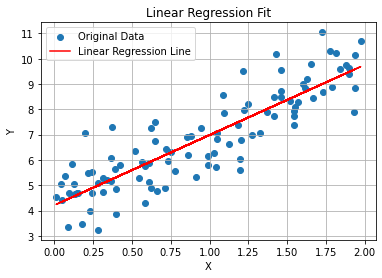

Correlation Coefficient (Corr(X,Y)): 0.8770824028342054
Coefficient of Determination (R^2): 0.7692735413614232
Variance of Residuals: 0.8065845639670531
Expected Variance of Residuals based on R^2: 0.8065845639670501


In [3]:
# Set a random seed for reproducibility
np.random.seed(42)

# Let's start generating a synthetic dataset
# --------------------------------

# Generate random values for X
X = 2 * np.random.rand(100, 1)
# Generate Y values with a linear relationship to X
# For this example, we'll assume a true relationship of Y = 4 + 3X + Gaussian noise
Y = 4 + 3 * X + np.random.randn(100, 1)

# Let's implement the Linear Regression Algorithm
# --------------------------------------------

# Calculate the covariance between X and Y
cov_XY = np.mean(X * Y) - np.mean(X) * np.mean(Y)

# Calculate the variance of X
var_X = np.var(X)

# Determine the coefficient β using the relationship
# β = Cov(X,Y) / Var(X)
beta = cov_XY / var_X

# Determine the intercept b
# b = E(Y) - β * E(X)
b = np.mean(Y) - beta * np.mean(X)

# Predict values of Y using the obtained b and β
Y_pred = b + beta * X

# Let's calculate the correlation coefficient, R^2, and relate it to the variance of the errors
# ------------------------------------------------------------------------------------------

# Calculate the correlation coefficient Corr(X,Y)
correlation_coefficient = np.corrcoef(X.squeeze(), Y.squeeze())[0, 1]

# Calculate R^2
R_squared = correlation_coefficient**2

# Calculate the residuals (errors)
residuals = Y - Y_pred

# Calculate the variance of the residuals
var_residuals = np.var(residuals)

# Calculate the expected variance of the residuals based on R^2
expected_var_residuals = np.var(Y) * (1 - R_squared)

# Let's finally plot the results and print the calculated values
# ---------------------------------------------------

# Plot the original data and the linear regression line
plt.scatter(X, Y, label="Original Data")
plt.plot(X, Y_pred, color="red", label="Linear Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

# Print the results
print(f"Correlation Coefficient (Corr(X,Y)): {correlation_coefficient}")
print(f"Coefficient of Determination (R^2): {R_squared}")
print(f"Variance of Residuals: {var_residuals}")
print(f"Expected Variance of Residuals based on R^2: {expected_var_residuals}")